In [56]:
import os
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [57]:
#load in trained model

model = keras.models.load_model('classification_model/')

## testing unlabeled data

In [58]:
test_folder = os.listdir('../Data/from_kaggle/test')
categories = []
       
test_df = pd.DataFrame({
    'file': test_folder, 
    'category': 0 #category to be filled later with prediction
})

In [59]:
test_df.head()

,file,category
0,9733.jpg,0
1,63.jpg,0
2,6400.jpg,0
3,823.jpg,0
4,4217.jpg,0


In [60]:
test_df.shape

(12500, 2)

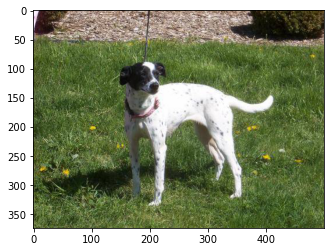

In [61]:
# load in single image
test_sample = test_df['file'][3]
load_test = load_img('../Data/from_kaggle/test/' + test_sample)
plt.imshow(load_test);

In [62]:
test_df['file'][3]

'823.jpg'

In [63]:
#Test data to follow training process
test_gen = ImageDataGenerator(rescale=1 / 255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    '../Data/from_kaggle/test/', 
    x_col = 'file',
    y_col = None,
    class_mode = None,
    target_size = (250, 250),
    batch_size = 12,
    shuffle = False
)

Found 12500 validated image filenames.


In [64]:
predict = model.predict(test_generator, steps = np.ceil(12500 / 12))

In [65]:
predict

array([[0.99503267, 0.00496728],
       [0.8718859 , 0.12811404],
       [0.0334179 , 0.96658206],
       ...,
       [0.8594663 , 0.14053366],
       [0.993182  , 0.00681804],
       [0.00213862, 0.9978613 ]], dtype=float32)

In [66]:
# Original model had cats as 0, dogs as 1
def label(predict):
    if(predict > 0.5):
        return 'Cat'
    else:
        return 'Dog'

In [69]:
test_df['category'] = predict
test_df['category'] = test_df['category'].apply(label)

In [70]:
#show predictions
test_df.head()

,file,category
0,9733.jpg,Cat
1,63.jpg,Cat
2,6400.jpg,Dog
3,823.jpg,Dog
4,4217.jpg,Cat


In [71]:
test_df['category'].value_counts()

Cat    6599
Dog    5901
Name: category, dtype: int64

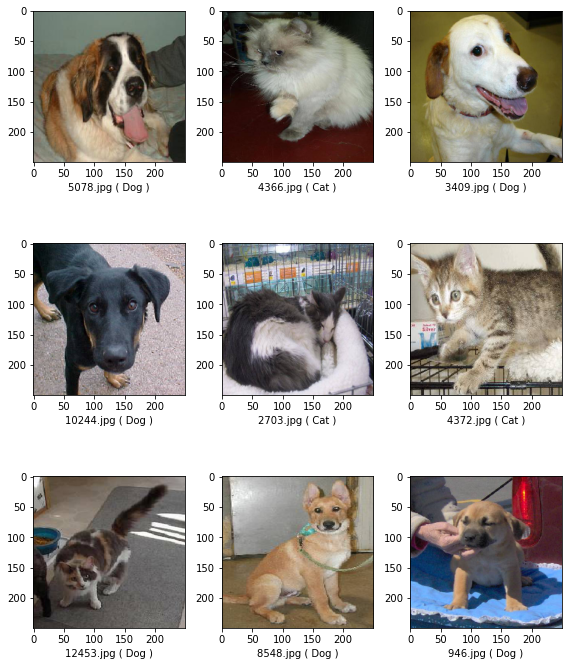

In [75]:
v = random.randint(0, 12000)

sample_test = test_df.iloc[v:(v+9)].reset_index(drop = True)
sample_test.head()

plt.figure(figsize=(8, 10))
for index, row in sample_test.iterrows():
    filename = row['file']
    category = row['category']
    img = load_img('../Data/from_kaggle/test/' + filename, target_size = (250, 250))
    plt.subplot(3, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(filename + ' ( ' + category + ' )')
plt.tight_layout()

plt.show()

In [52]:
def key_function(filename):
    key_file = os.listdir('../images/key_image/')

    #df to house file
    key_df = pd.DataFrame({
        'key': key_file, 
        'label': 0 #filled later with prediction
    })
    
    #show filename, and ignore checkpoints
    output = key_df[key_df['key'] == filename].copy()

    #print image
    load_key = output['key'].iloc[0]
    key = load_img('../images/key_image/' + load_key)
    plt.imshow(key);
    
    #Keras Image Data Generator
    key_gen = ImageDataGenerator(rescale = 1/255)
    key_generator = key_gen.flow_from_dataframe(
    output, 
    '../images/key_image/', 
    x_col = 'key', 
    y_col = None, 
    class_mode = None, 
    target_size = (250, 250), 
    batch_size = 12, 
    shuffle = False
    )
    
    #predict
    predict = model.predict(key_generator)
    output['label'] = predict
    output['label'] = output['label'].apply(label)
    return output['label'].iloc[0]

Found 1 validated image filenames.


'Cat'

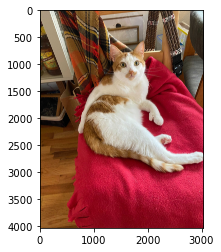

In [53]:
key_function('ollie.jpg')